In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Read the CSV file into a DataFrame
df = pd.read_csv('D:/AI-ML/Capstone Project Sem 8/MergingData/final_merged_df.csv',na_values='None')

# Display the DataFrame
df

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Temp,RH,WS,WD
0,2017-01-11 00:00:00,2017-01-11 01:00:00,332.50,494.00,23.90,107.45,76.58,100.97,55.50,3.00,8.90,0.60,NaN,31.38,80.75,0.72,143.00
1,2017-01-11 01:00:00,2017-01-11 02:00:00,295.50,435.50,20.42,95.42,67.38,104.13,45.20,2.44,10.70,0.55,NaN,30.73,81.25,0.53,126.75
2,2017-01-11 02:00:00,2017-01-11 03:00:00,270.00,395.00,18.22,77.62,56.10,99.42,29.12,1.97,12.18,0.50,NaN,30.65,82.00,0.60,161.25
3,2017-01-11 03:00:00,2017-01-11 04:00:00,248.50,352.75,16.52,74.72,53.18,97.13,20.62,1.77,10.75,0.43,NaN,30.63,83.00,0.50,113.75
4,2017-01-11 04:00:00,2017-01-11 05:00:00,261.75,365.50,16.43,82.20,57.07,97.62,17.85,1.65,8.72,0.40,NaN,31.23,85.25,0.85,104.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33212,2021-12-11 19:00:00,2021-12-11 20:00:00,316.25,709.50,185.43,139.25,224.80,46.30,16.30,4.47,38.43,14.35,74.10,31.07,81.25,0.32,151.00
33213,2021-12-11 20:00:00,2021-12-11 21:00:00,397.75,743.75,242.80,148.68,276.50,43.05,16.62,4.98,39.30,14.70,76.80,29.60,84.50,0.30,151.00
33214,2021-12-11 21:00:00,2021-12-11 22:00:00,471.50,765.75,276.50,137.30,297.80,40.27,15.95,0.01,37.17,15.70,79.40,29.57,86.75,0.30,151.00
33215,2021-12-11 22:00:00,2021-12-11 23:00:00,500.00,763.50,292.30,118.07,300.48,42.33,17.05,7.37,51.85,15.60,79.22,29.43,87.25,0.35,151.00


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33217 entries, 0 to 33216
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  33217 non-null  object 
 1   To Date    33217 non-null  object 
 2   PM2.5      31828 non-null  float64
 3   PM10       31020 non-null  float64
 4   NO         31320 non-null  float64
 5   NO2        30763 non-null  float64
 6   NOx        32141 non-null  float64
 7   NH3        30578 non-null  float64
 8   SO2        31631 non-null  float64
 9   CO         32161 non-null  float64
 10  Ozone      31264 non-null  float64
 11  Benzene    26327 non-null  float64
 12  Toluene    26254 non-null  float64
 13  Temp       32251 non-null  float64
 14  RH         32262 non-null  float64
 15  WS         32151 non-null  float64
 16  WD         31390 non-null  float64
dtypes: float64(15), object(2)
memory usage: 4.3+ MB


In [103]:
columns_to_drop=['Benzene','Toluene','NO','NOx']
df=df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33217 entries, 0 to 33216
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  33217 non-null  object 
 1   To Date    33217 non-null  object 
 2   PM2.5      31828 non-null  float64
 3   PM10       31020 non-null  float64
 4   NO2        30763 non-null  float64
 5   NH3        30578 non-null  float64
 6   SO2        31631 non-null  float64
 7   CO         32161 non-null  float64
 8   Ozone      31264 non-null  float64
 9   Temp       32251 non-null  float64
 10  RH         32262 non-null  float64
 11  WS         32151 non-null  float64
 12  WD         31390 non-null  float64
dtypes: float64(11), object(2)
memory usage: 3.3+ MB


In [104]:
df.isnull().sum()

From Date       0
To Date         0
PM2.5        1389
PM10         2197
NO2          2454
NH3          2639
SO2          1586
CO           1056
Ozone        1953
Temp          966
RH            955
WS           1066
WD           1827
dtype: int64

In [105]:
# Convert 'From Date' and 'To Date' columns to datetime
df['From Date'] = pd.to_datetime(df['From Date'])
df['To Date'] = pd.to_datetime(df['To Date'])
# Set 'From Date' as the index
df.set_index('From Date', inplace=True)

## Data Visualization before Imputation

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17000\554137611.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


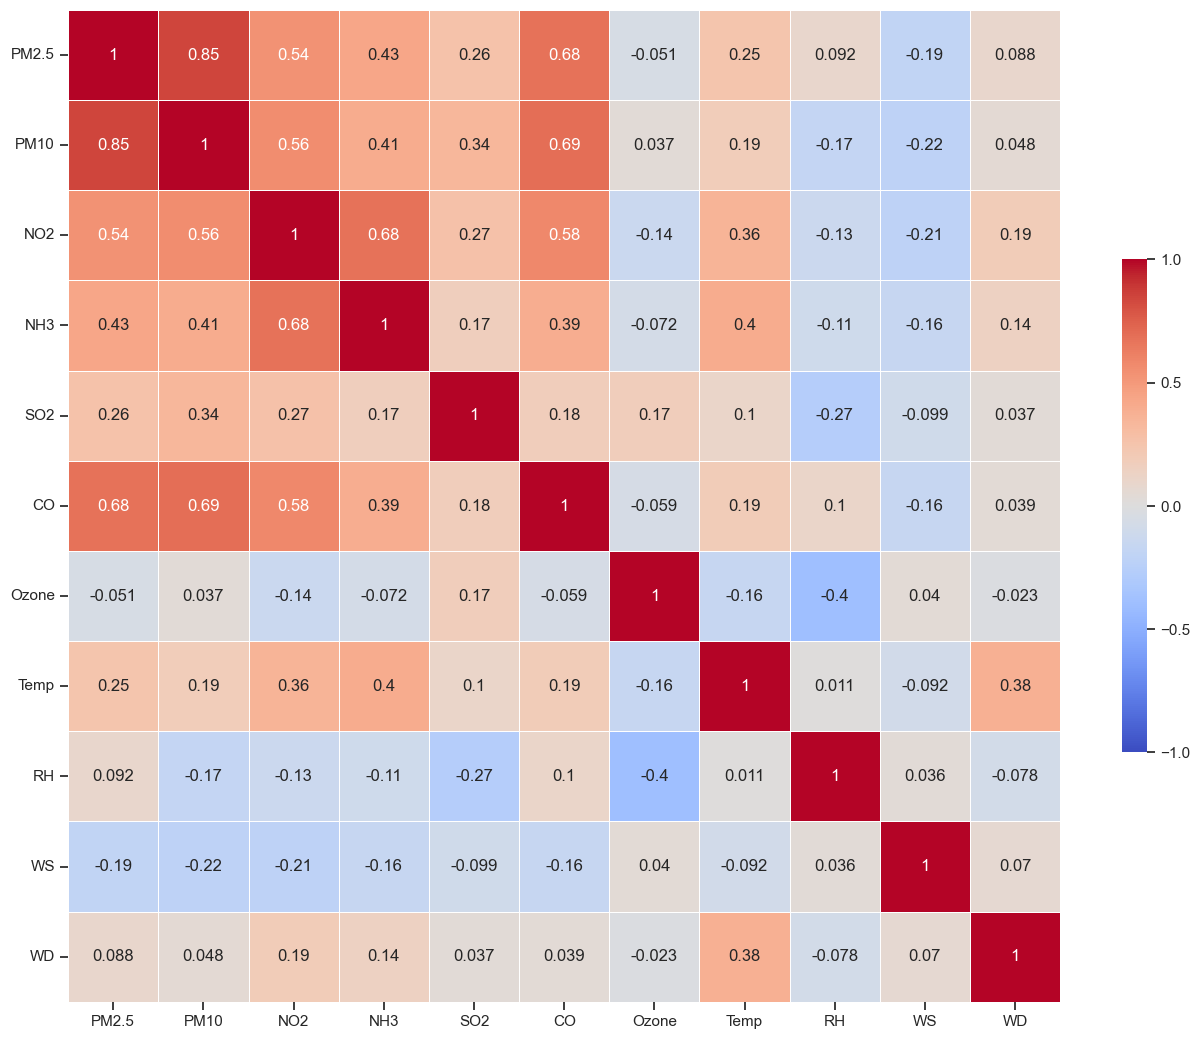

In [106]:
def correlation(df): 
    corr_matrix=df.corr()
    f, ax = plt.subplots(figsize=(16, 16))
    heatmap = sns.heatmap(corr_matrix,
                        #mask = mask,
                        square = True,
                        linewidths = .5,
                        cmap = 'coolwarm',
                        cbar_kws = {'shrink': .4,
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                        vmin = -1,
                        vmax = 1,
                        annot = True,
                        annot_kws = {"size": 12})

    #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)

    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

correlation(df)

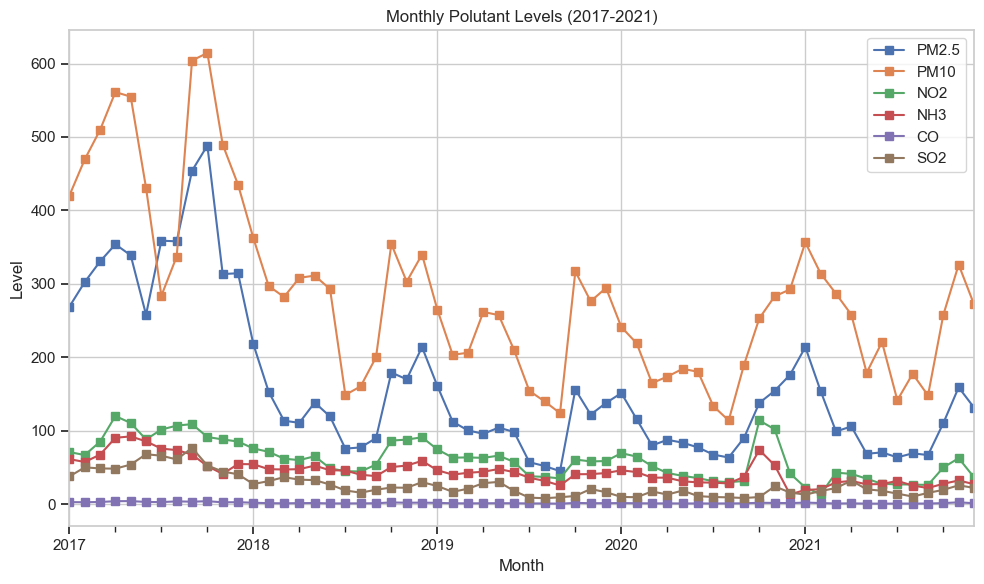

In [107]:
# Resample the data at monthly intervals, taking the mean PM2.5 and PM10 values for each month
monthly_pm25 = df['PM2.5'].resample('M').mean()
monthly_pm10 = df['PM10'].resample('M').mean()
#monthly_NO = df['NO'].resample('M').mean()
monthly_NO2 = df['NO2'].resample('M').mean()
#monthly_NOx = df['NOx'].resample('M').mean()
monthly_NH3 = df['NH3'].resample('M').mean()
monthly_CO = df['CO'].resample('M').mean()
monthly_SO2 = df['SO2'].resample('M').mean()

# Plot both PM2.5 and PM10 values on the same plot
plt.figure(figsize=(10, 6))
monthly_pm25.plot(marker='s', linestyle='-', label='PM2.5')
monthly_pm10.plot(marker='s', linestyle='-', label='PM10')
#monthly_NO.plot(marker='s', linestyle='-', label='NO')
monthly_NO2.plot(marker='s', linestyle='-', label='NO2')
#monthly_NOx.plot(marker='s', linestyle='-', label='NOx')
monthly_NH3.plot(marker='s', linestyle='-', label='NH3') 
monthly_CO.plot(marker='s', linestyle='-', label='CO')
monthly_SO2.plot(marker='s', linestyle='-', label='SO2')
plt.title('Monthly Polutant Levels (2017-2021)')
plt.xlabel('Month')
plt.ylabel('Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

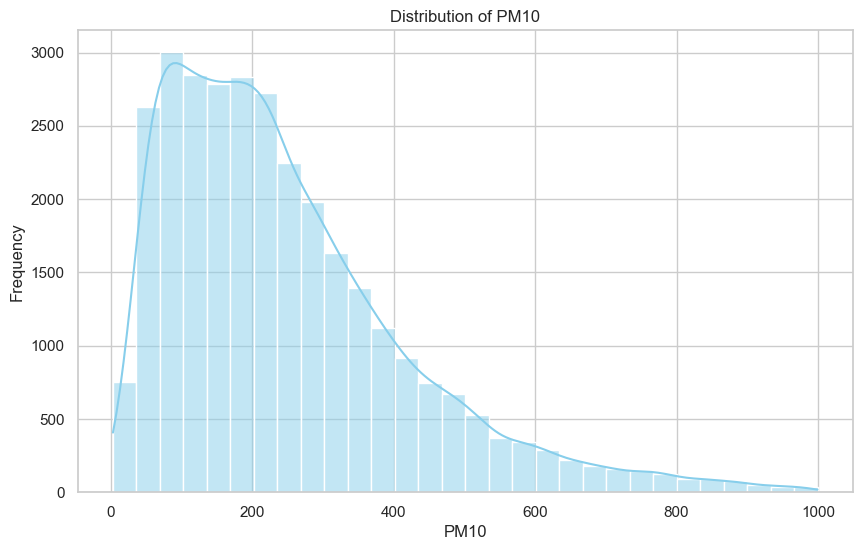

In [108]:
# Assuming your data is stored in a DataFrame named df
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['PM10'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of PM10')
plt.xlabel('PM10')
plt.ylabel('Frequency')
plt.show()

### Data Distribution Month Wise

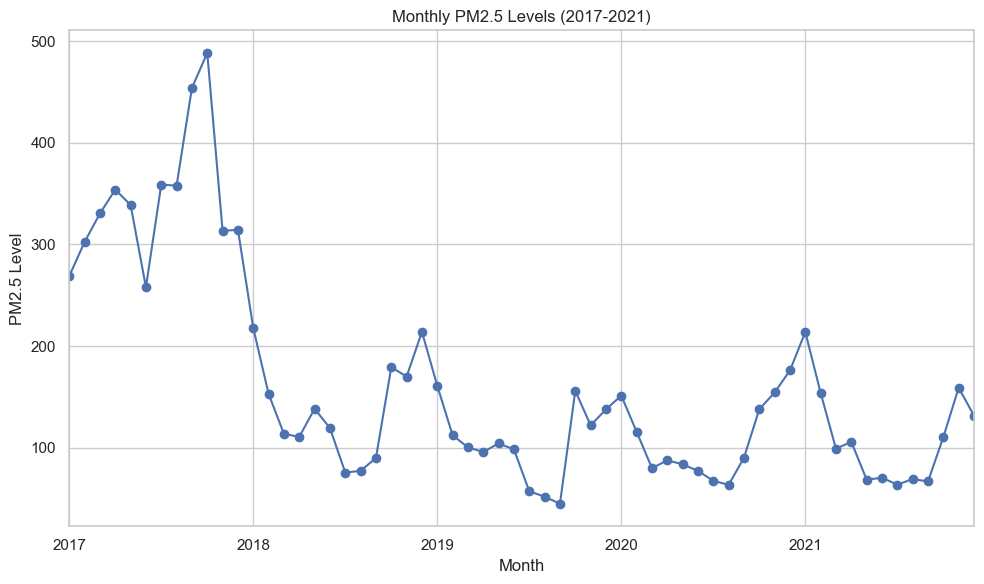

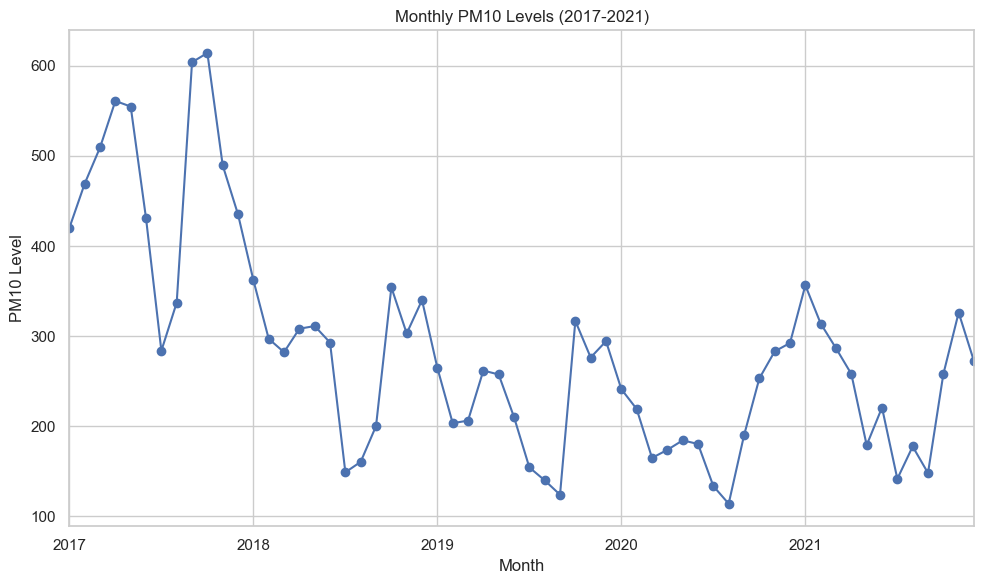

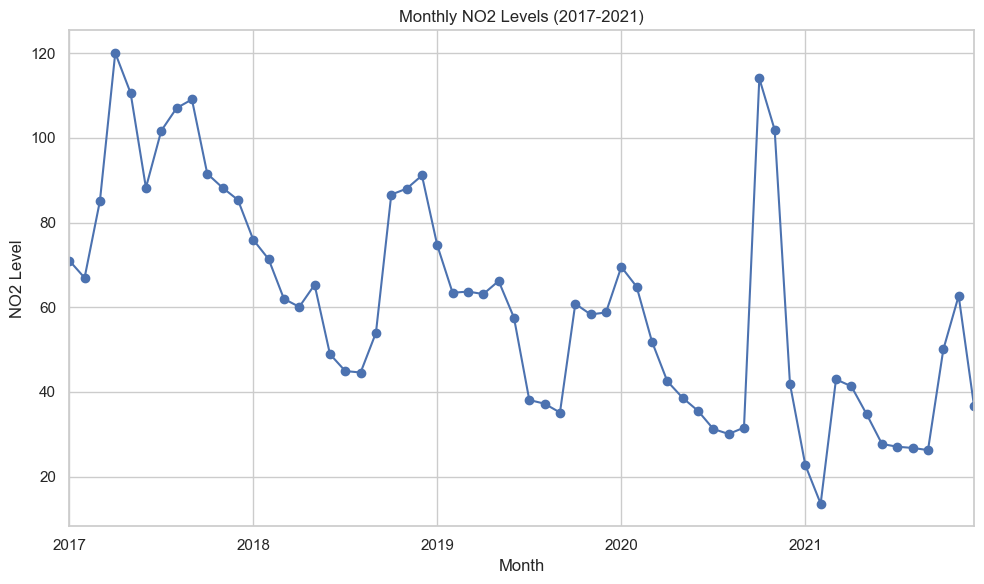

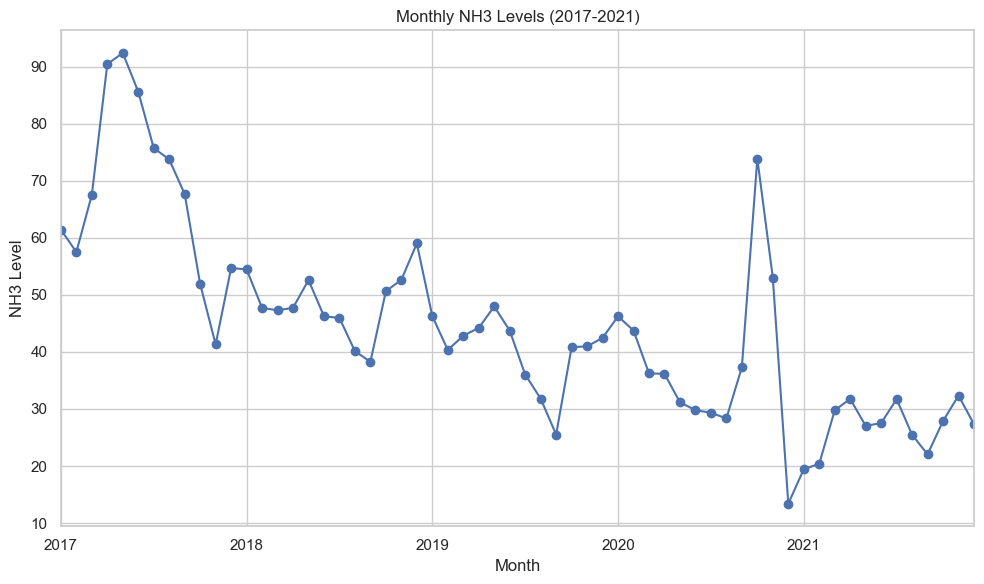

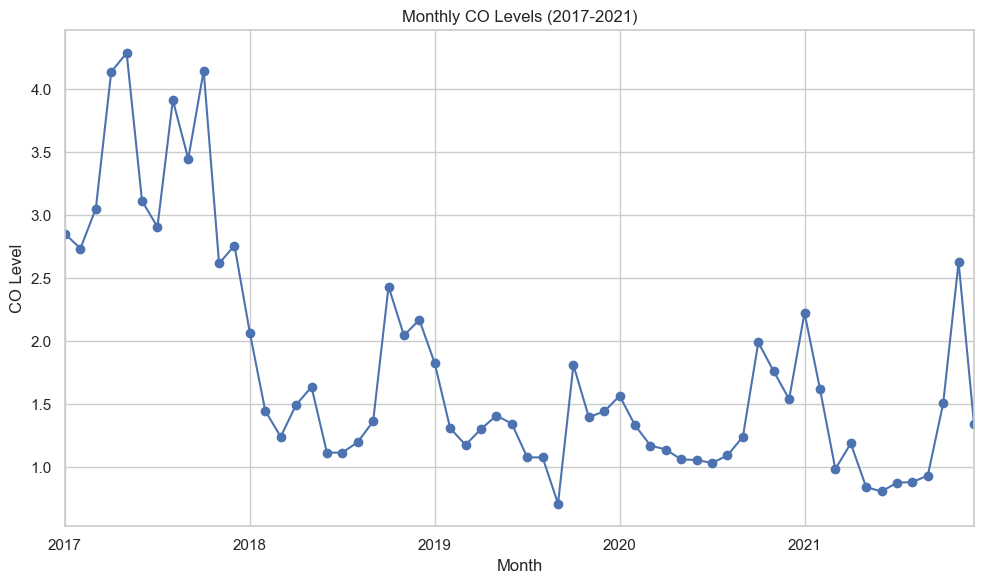

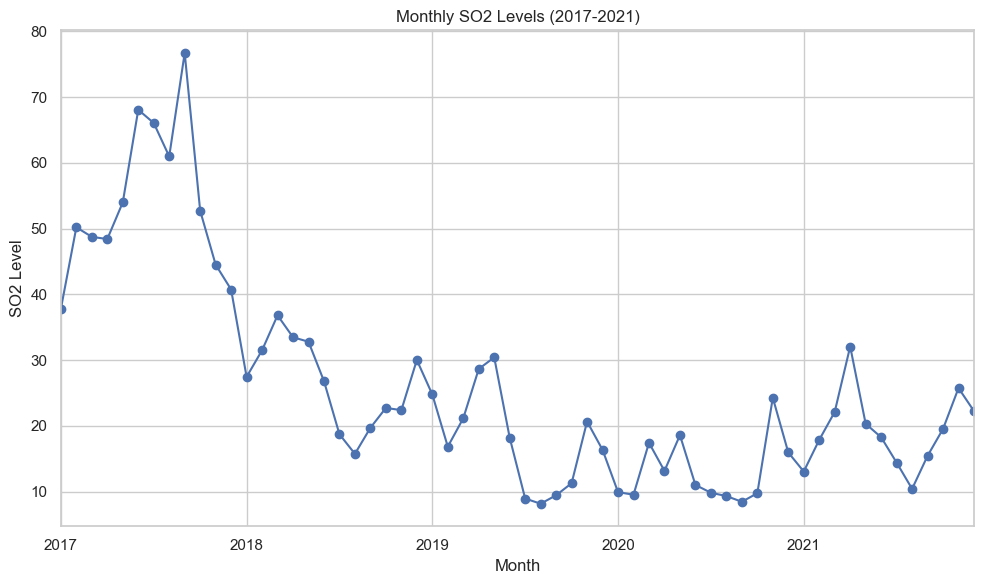

In [109]:
def plot_g(value,df):
    monthly_value = df[value].resample('M').mean()
    # Plot the monthly PM2.5 data
    plt.figure(figsize=(10, 6))
    monthly_value.plot(marker='o', linestyle='-')
    plt.title('Monthly '+ value +' Levels (2017-2021)')
    plt.xlabel('Month')
    plt.ylabel(value + ' Level')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

l= ['PM2.5','PM10','NO2','NH3','CO','SO2']
for i in l:
    plot_g(i,df)

### Data Distribution Day Wise

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17000\693981794.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  month_data = df['2018-01-1']


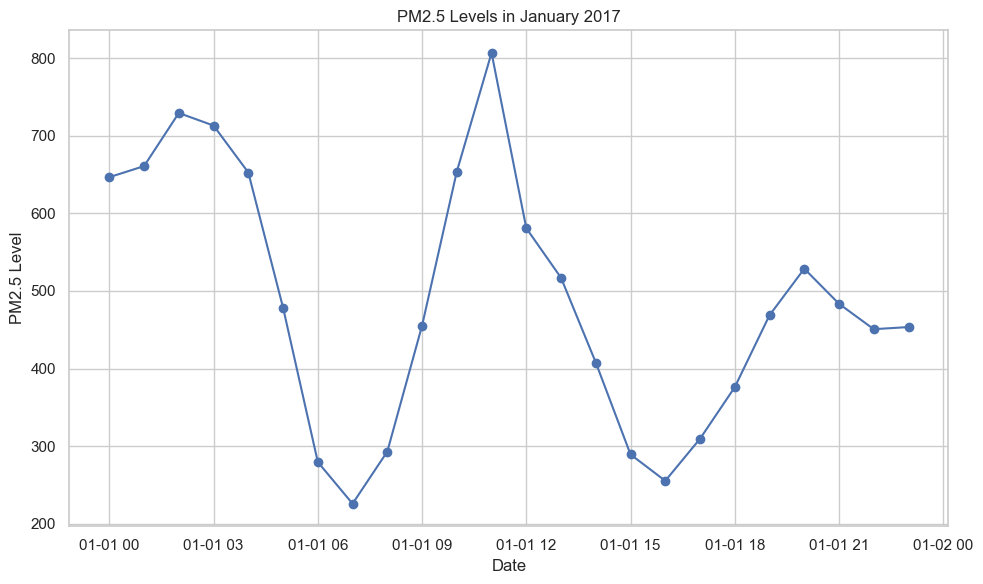

In [110]:
# Filter data for a specific day (e.g., January 2017)
month_data = df['2018-01-1']

# Plot PM2.5 values for the month
plt.figure(figsize=(10, 6))
plt.plot(month_data.index, month_data['PM2.5'], marker='o', linestyle='-')
plt.title('PM2.5 Levels in January 2017')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.grid(True)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [111]:
df.drop(columns=['To Date'],inplace=True)
df = df.rename_axis('Datetime')
df

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD
Datetime,,,,,,,,,,,
2017-01-11 00:00:00,332.50,494.00,107.45,100.97,55.50,3.00,8.90,31.38,80.75,0.72,143.00
2017-01-11 01:00:00,295.50,435.50,95.42,104.13,45.20,2.44,10.70,30.73,81.25,0.53,126.75
2017-01-11 02:00:00,270.00,395.00,77.62,99.42,29.12,1.97,12.18,30.65,82.00,0.60,161.25
2017-01-11 03:00:00,248.50,352.75,74.72,97.13,20.62,1.77,10.75,30.63,83.00,0.50,113.75
2017-01-11 04:00:00,261.75,365.50,82.20,97.62,17.85,1.65,8.72,31.23,85.25,0.85,104.00
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-11 19:00:00,316.25,709.50,139.25,46.30,16.30,4.47,38.43,31.07,81.25,0.32,151.00
2021-12-11 20:00:00,397.75,743.75,148.68,43.05,16.62,4.98,39.30,29.60,84.50,0.30,151.00
2021-12-11 21:00:00,471.50,765.75,137.30,40.27,15.95,0.01,37.17,29.57,86.75,0.30,151.00


### Imputation

#### Libraries Used

In [112]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import FactorAnalysis
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

#### 1. Mean Imputation

In [113]:
imputer = SimpleImputer(strategy='mean')
df_mean = imputer.fit_transform(df)
df_mean =pd.DataFrame(df_mean, columns=df.columns) 
df_mean.index=df.index

# Specifying the file path where you want to save the CSV file
csv_file_path = 'Datasets/Mean_Impute.csv'

# Writing the DataFrame to a CSV file
df_mean.to_csv(csv_file_path)

df_mean.describe()


,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD
count,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000
mean,124.351538,247.975838,55.224268,39.996293,20.505857,1.473918,42.053413,29.118809,66.443967,1.702776,163.815634
std,122.897256,166.747254,41.112942,20.381406,23.132765,1.352899,35.968115,2.709839,18.374013,3.429271,90.431811
min,0.250000,3.000000,0.030000,0.030000,0.100000,0.000000,0.100000,14.500000,7.000000,0.300000,1.000000
25%,43.500000,125.000000,24.550000,27.300000,6.700000,0.710000,15.830000,27.700000,53.500000,0.480000,108.500000
50%,84.000000,223.500000,49.380000,39.030000,13.150000,1.070000,31.800000,29.670000,67.500000,1.180000,164.250000
75%,159.750000,320.000000,74.400000,48.370000,23.750000,1.660000,54.920000,30.880000,81.000000,1.820000,240.250000
max,995.000000,999.250000,463.550000,462.400000,200.000000,15.420000,199.600000,59.750000,100.000000,50.000000,354.000000


#### 2. Median Imputation

In [114]:
imputer = SimpleImputer(strategy='median')
df_median = imputer.fit_transform(df)
df_median =pd.DataFrame(df_median, columns=df.columns) 
df_median.index=df.index

# Specifying the file path where you want to save the CSV file
csv_file_path = 'Datasets/Median_Impute.csv'

# Writing the DataFrame to a CSV file
df_median.to_csv(csv_file_path)

df_median.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD
count,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000
mean,122.455121,245.480620,54.418685,39.762218,20.118829,1.460123,41.307395,29.137746,66.503078,1.684073,164.224539
std,123.232086,167.010651,41.211765,20.396975,23.197248,1.355039,36.091755,2.712047,18.377225,3.430809,90.447694
min,0.250000,3.000000,0.030000,0.030000,0.100000,0.000000,0.100000,14.500000,7.000000,0.300000,1.000000
25%,43.500000,125.000000,24.550000,27.300000,6.700000,0.710000,15.830000,27.700000,53.500000,0.480000,108.500000
50%,79.000000,210.250000,44.320000,37.050000,12.400000,1.040000,29.365000,29.770000,68.500000,1.120000,171.250000
75%,159.750000,320.000000,74.400000,48.370000,23.750000,1.660000,54.920000,30.880000,81.000000,1.820000,240.250000
max,995.000000,999.250000,463.550000,462.400000,200.000000,15.420000,199.600000,59.750000,100.000000,50.000000,354.000000


#### 3. Back Fill Imputation

In [115]:
df_bfill=df.fillna(method='bfill')

# Specifying the file path where you want to save the CSV file
csv_file_path = 'Datasets/Back Fill.csv'

# Writing the DataFrame to a CSV file
df_bfill.to_csv(csv_file_path)

df_bfill.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD
count,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.00000,33217.000000,33217.000000,33217.000000,33217.000000
mean,125.465402,245.451177,52.561521,39.495133,20.432778,1.453294,42.58215,29.109568,66.543577,1.856008,160.402603
std,132.215257,176.239727,42.994129,25.753773,24.015408,1.363211,38.57042,2.751879,18.660250,4.196857,95.246269
min,0.250000,3.000000,0.030000,0.030000,0.100000,0.000000,0.10000,14.500000,7.000000,0.300000,1.000000
25%,41.250000,114.000000,21.000000,25.100000,6.400000,0.690000,14.83000,27.620000,53.000000,0.470000,92.750000
50%,78.000000,205.000000,40.780000,36.250000,12.220000,1.020000,29.12000,29.750000,68.750000,1.150000,168.500000
75%,164.500000,327.250000,74.970000,49.330000,24.480000,1.670000,57.80000,30.900000,81.500000,1.880000,243.250000
max,995.000000,999.250000,463.550000,462.400000,200.000000,15.420000,199.60000,59.750000,100.000000,50.000000,354.000000


#### 4. Forward Fill Imputation

In [116]:
df_ffill=df.fillna(method='ffill')

# Specifying the file path where you want to save the CSV file
csv_file_path = 'Datasets/Forward Fill.csv'

# Writing the DataFrame to a CSV file
df_ffill.to_csv(csv_file_path)

df_ffill.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD
count,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000
mean,124.407412,249.136097,53.125052,38.415976,20.636399,1.460073,43.205385,29.108666,66.495424,1.854512,160.040070
std,129.522438,178.857180,42.973077,23.049231,24.519252,1.361969,38.703504,2.869453,18.685142,4.160458,95.476704
min,0.250000,3.000000,0.030000,0.030000,0.100000,0.000000,0.100000,14.500000,7.000000,0.300000,1.000000
25%,41.250000,116.000000,21.330000,24.520000,6.300000,0.700000,15.270000,27.550000,53.000000,0.470000,93.000000
50%,77.250000,207.250000,41.850000,35.900000,12.270000,1.020000,29.650000,29.730000,68.500000,1.150000,168.750000
75%,163.500000,332.000000,75.350000,48.950000,24.550000,1.680000,59.280000,30.900000,81.500000,1.900000,242.750000
max,995.000000,999.250000,463.550000,462.400000,200.000000,15.420000,199.600000,59.750000,100.000000,50.000000,354.000000


#### 5. ExtraTree Regessor Using Iterative Imputer

In [117]:
"""imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_jobs=1),max_iter=7)
test=imputer.fit_transform(df) # Fitted the imputer to the data and transformed it

# Specifying the file path where you want to save the CSV file
csv_file_path = 'Datasets/ET_Regressor.csv'

# Writing the DataFrame to a CSV file
df_et.to_csv(csv_file_path)"""

df_et=pd.read_csv('Datasets\ET_Regressor.csv',na_values='None')
df_et['Datetime']=pd.to_datetime(df_et['Datetime'])
df_et.set_index('Datetime', inplace=True)
df_et

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD
Datetime,,,,,,,,,,,
2017-01-11 00:00:00,332.50,494.00,107.45,100.97,55.50,3.00,8.90,31.38,80.75,0.72,143.00
2017-01-11 01:00:00,295.50,435.50,95.42,104.13,45.20,2.44,10.70,30.73,81.25,0.53,126.75
2017-01-11 02:00:00,270.00,395.00,77.62,99.42,29.12,1.97,12.18,30.65,82.00,0.60,161.25
2017-01-11 03:00:00,248.50,352.75,74.72,97.13,20.62,1.77,10.75,30.63,83.00,0.50,113.75
2017-01-11 04:00:00,261.75,365.50,82.20,97.62,17.85,1.65,8.72,31.23,85.25,0.85,104.00
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-11 19:00:00,316.25,709.50,139.25,46.30,16.30,4.47,38.43,31.07,81.25,0.32,151.00
2021-12-11 20:00:00,397.75,743.75,148.68,43.05,16.62,4.98,39.30,29.60,84.50,0.30,151.00
2021-12-11 21:00:00,471.50,765.75,137.30,40.27,15.95,0.01,37.17,29.57,86.75,0.30,151.00


In [118]:
df_et.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NH3      0
SO2      0
CO       0
Ozone    0
Temp     0
RH       0
WS       0
WD       0
dtype: int64

In [119]:
df_et.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD
count,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000
mean,124.788923,248.887406,53.638042,38.824282,20.814701,1.459626,42.751356,29.164504,65.822773,1.784234,163.185743
std,125.577953,174.225053,42.379102,21.552019,23.378628,1.356136,36.413120,2.726529,18.725401,3.724621,93.305195
min,0.250000,3.000000,0.030000,0.030000,0.100000,0.000000,0.100000,14.500000,7.000000,0.300000,1.000000
25%,43.250000,120.500000,22.050000,25.480000,6.620000,0.710000,15.770000,27.700000,51.250000,0.480000,98.250000
50%,83.000000,215.000000,44.200000,37.020000,12.850000,1.010000,31.070000,29.880000,67.500000,1.180000,171.750000
75%,162.250000,327.500000,75.120000,48.780000,26.680000,1.660000,56.750000,30.880000,81.000000,1.943000,241.375000
max,995.000000,999.250000,463.550000,462.400000,200.000000,15.420000,199.600000,59.750000,100.000000,50.000000,354.000000


#### 6. PPCA Imputation

In [120]:
# Replace NaN values with the mean for each column
df_filled = df.fillna(df.mean())

# Perform PPCA
num_latent_variables = 2  # You can adjust this based on your analysis
ppca_model = FactorAnalysis(n_components=num_latent_variables)
df_transformed = ppca_model.fit_transform(df_filled)

# Transform the imputed data back to the original space
df_imputed = pd.DataFrame(np.dot(df_transformed, ppca_model.components_) + ppca_model.mean_, columns=df.columns, index=df.index)

# Display the imputed DataFrame
df_imputed

df_result=df.combine_first(df_imputed)

# Specifying the file path where you want to save the CSV file
csv_file_path = 'Datasets/PCCA_Impute.csv'

# Writing the DataFrame to a CSV file
df_result.to_csv(csv_file_path)

df_result.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD
count,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000
mean,124.561004,248.468040,55.791880,40.117335,20.502858,1.474039,42.050464,29.118946,66.443967,1.706425,163.804515
std,123.232717,169.174701,41.572418,20.516775,23.154325,1.353425,35.969187,2.709875,18.374013,3.429883,90.431843
min,-0.721756,3.000000,0.030000,0.030000,0.100000,0.000000,0.100000,14.500000,7.000000,0.300000,1.000000
25%,43.250000,125.000000,24.520000,27.250000,6.700000,0.710000,15.830000,27.700000,53.500000,0.480000,108.500000
50%,83.250000,215.000000,48.100000,38.080000,13.050000,1.060000,31.800000,29.680000,67.500000,1.180000,164.250000
75%,161.750000,324.763034,76.500000,49.050000,24.120000,1.660000,54.920000,30.880000,81.000000,1.830000,240.250000
max,995.000000,999.250000,463.550000,462.400000,200.000000,15.420000,199.600000,59.750000,100.000000,50.000000,354.000000


### Adding Columns

In [121]:
df=df_result
df.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD
count,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000
mean,124.561004,248.468040,55.791880,40.117335,20.502858,1.474039,42.050464,29.118946,66.443967,1.706425,163.804515
std,123.232717,169.174701,41.572418,20.516775,23.154325,1.353425,35.969187,2.709875,18.374013,3.429883,90.431843
min,-0.721756,3.000000,0.030000,0.030000,0.100000,0.000000,0.100000,14.500000,7.000000,0.300000,1.000000
25%,43.250000,125.000000,24.520000,27.250000,6.700000,0.710000,15.830000,27.700000,53.500000,0.480000,108.500000
50%,83.250000,215.000000,48.100000,38.080000,13.050000,1.060000,31.800000,29.680000,67.500000,1.180000,164.250000
75%,161.750000,324.763034,76.500000,49.050000,24.120000,1.660000,54.920000,30.880000,81.000000,1.830000,240.250000
max,995.000000,999.250000,463.550000,462.400000,200.000000,15.420000,199.600000,59.750000,100.000000,50.000000,354.000000


In [122]:
df['dow']=df.index.day_of_week
df['moy']=df.index.month
df['doty']=df.index.day_of_year
df['hour']=df.index.hour
df

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD,dow,moy,doty,hour
Datetime,,,,,,,,,,,,,,,
2017-01-11 00:00:00,332.50,494.00,107.45,100.97,55.50,3.00,8.90,31.38,80.75,0.72,143.00,2,1,11,0
2017-01-11 01:00:00,295.50,435.50,95.42,104.13,45.20,2.44,10.70,30.73,81.25,0.53,126.75,2,1,11,1
2017-01-11 02:00:00,270.00,395.00,77.62,99.42,29.12,1.97,12.18,30.65,82.00,0.60,161.25,2,1,11,2
2017-01-11 03:00:00,248.50,352.75,74.72,97.13,20.62,1.77,10.75,30.63,83.00,0.50,113.75,2,1,11,3
2017-01-11 04:00:00,261.75,365.50,82.20,97.62,17.85,1.65,8.72,31.23,85.25,0.85,104.00,2,1,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-11 19:00:00,316.25,709.50,139.25,46.30,16.30,4.47,38.43,31.07,81.25,0.32,151.00,5,12,345,19
2021-12-11 20:00:00,397.75,743.75,148.68,43.05,16.62,4.98,39.30,29.60,84.50,0.30,151.00,5,12,345,20
2021-12-11 21:00:00,471.50,765.75,137.30,40.27,15.95,0.01,37.17,29.57,86.75,0.30,151.00,5,12,345,21


## Data Visualization After Imputation

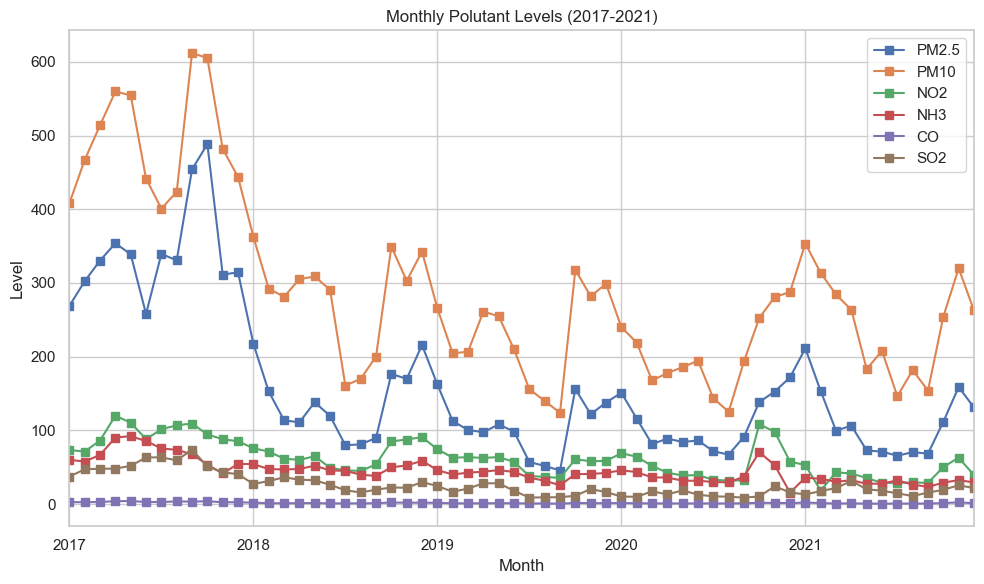

In [123]:
# Resample the data at monthly intervals, taking the mean PM2.5 and PM10 values for each month
monthly_pm25 = df['PM2.5'].resample('M').mean()
monthly_pm10 = df['PM10'].resample('M').mean()
#monthly_NO = df['NO'].resample('M').mean()
monthly_NO2 = df['NO2'].resample('M').mean()
#monthly_NOx = df['NOx'].resample('M').mean()
monthly_NH3 = df['NH3'].resample('M').mean()
monthly_CO = df['CO'].resample('M').mean()
monthly_SO2 = df['SO2'].resample('M').mean()

# Plot both PM2.5 and PM10 values on the same plot
plt.figure(figsize=(10, 6))
monthly_pm25.plot(marker='s', linestyle='-', label='PM2.5')
monthly_pm10.plot(marker='s', linestyle='-', label='PM10')
#monthly_NO.plot(marker='s', linestyle='-', label='NO')
monthly_NO2.plot(marker='s', linestyle='-', label='NO2')
#monthly_NOx.plot(marker='s', linestyle='-', label='NOx')
monthly_NH3.plot(marker='s', linestyle='-', label='NH3') 
monthly_CO.plot(marker='s', linestyle='-', label='CO')
monthly_SO2.plot(marker='s', linestyle='-', label='SO2')
plt.title('Monthly Polutant Levels (2017-2021)')
plt.xlabel('Month')
plt.ylabel('Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

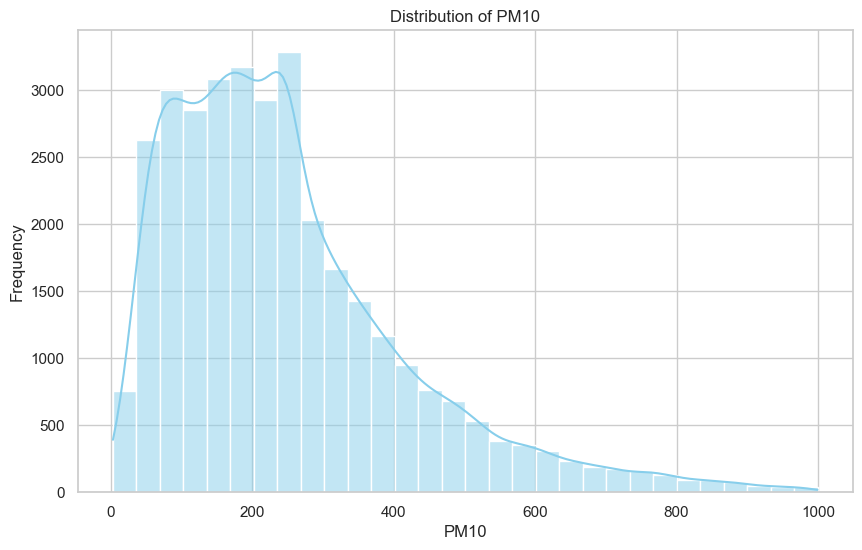

In [124]:
# Assuming your data is stored in a DataFrame named df
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['PM10'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of PM10')
plt.xlabel('PM10')
plt.ylabel('Frequency')
plt.show()

### Data Distribution Month Wise

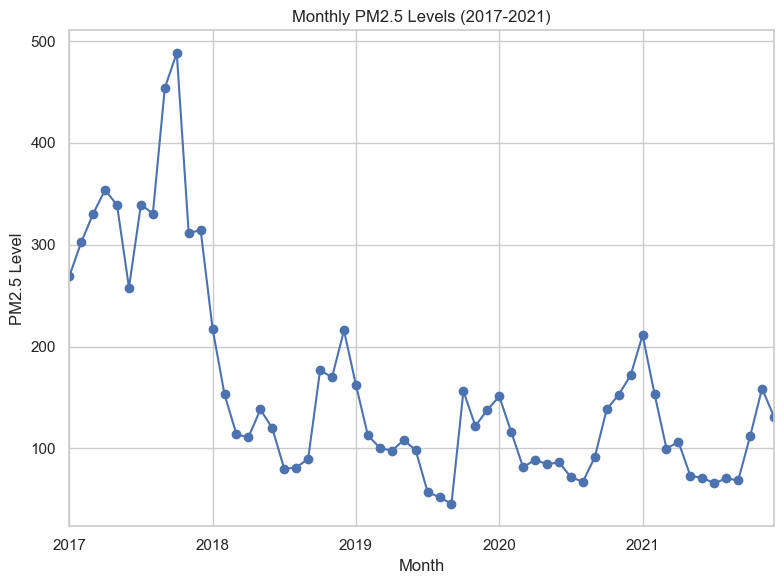

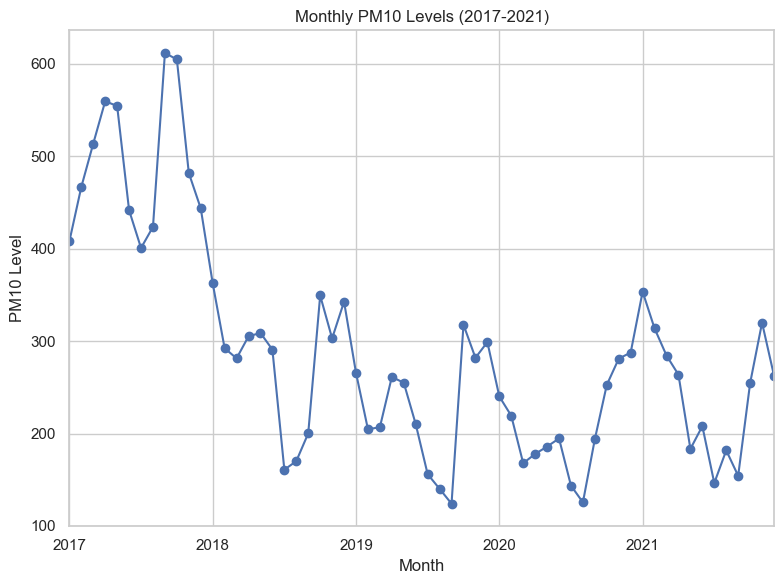

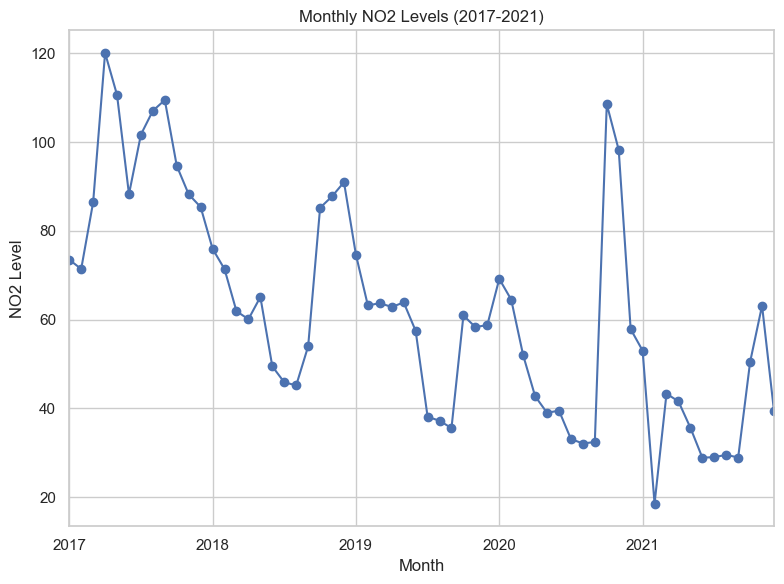

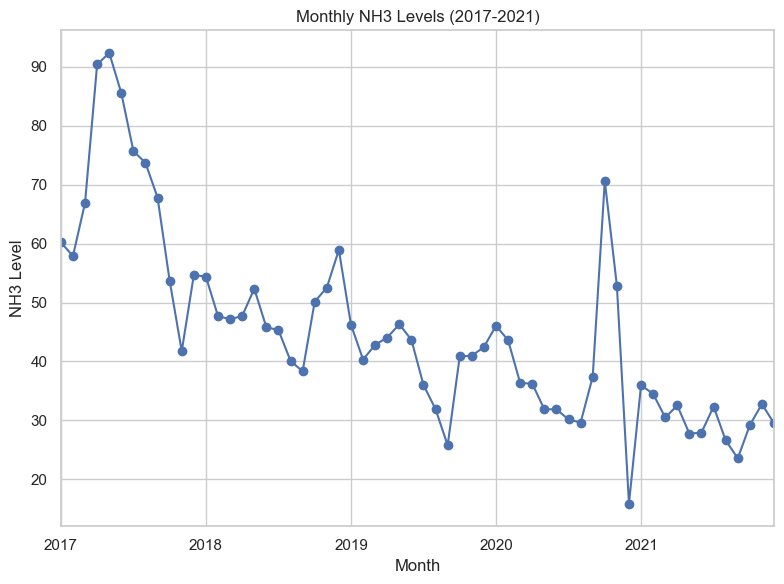

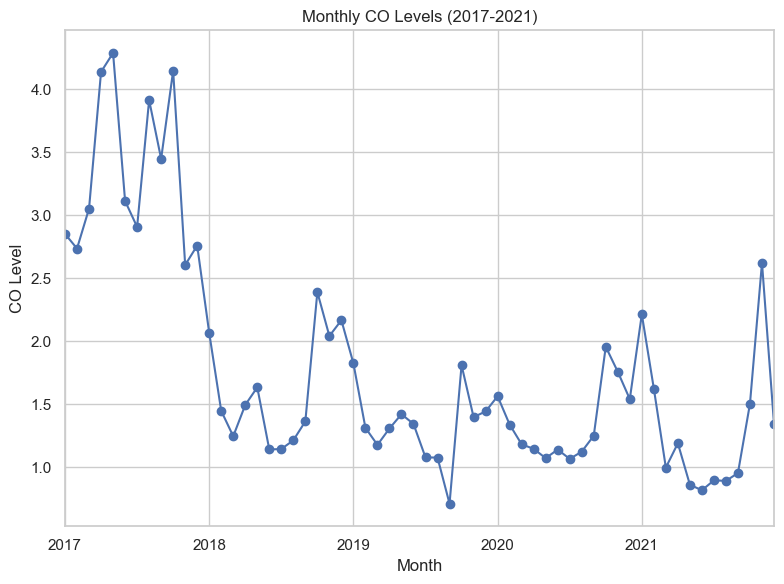

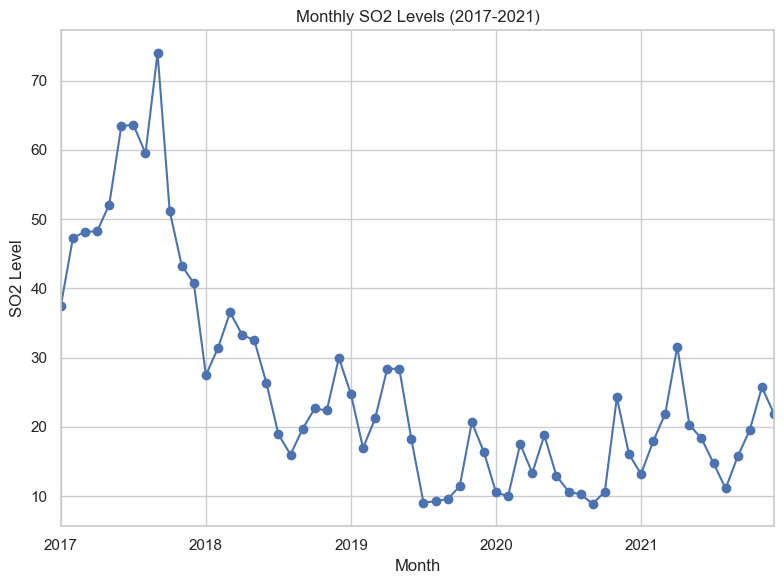

In [125]:
def plot_g(value,df):
    monthly_value = df[value].resample('M').mean()
    # Plot the monthly PM2.5 data
    plt.figure(figsize=(8, 6))
    monthly_value.plot(marker='o', linestyle='-')
    plt.title('Monthly '+ value +' Levels (2017-2021)')
    plt.xlabel('Month')
    plt.ylabel(value + ' Level')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

l= ['PM2.5','PM10','NO2','NH3','CO','SO2']
for i in l:
    plot_g(i,df)

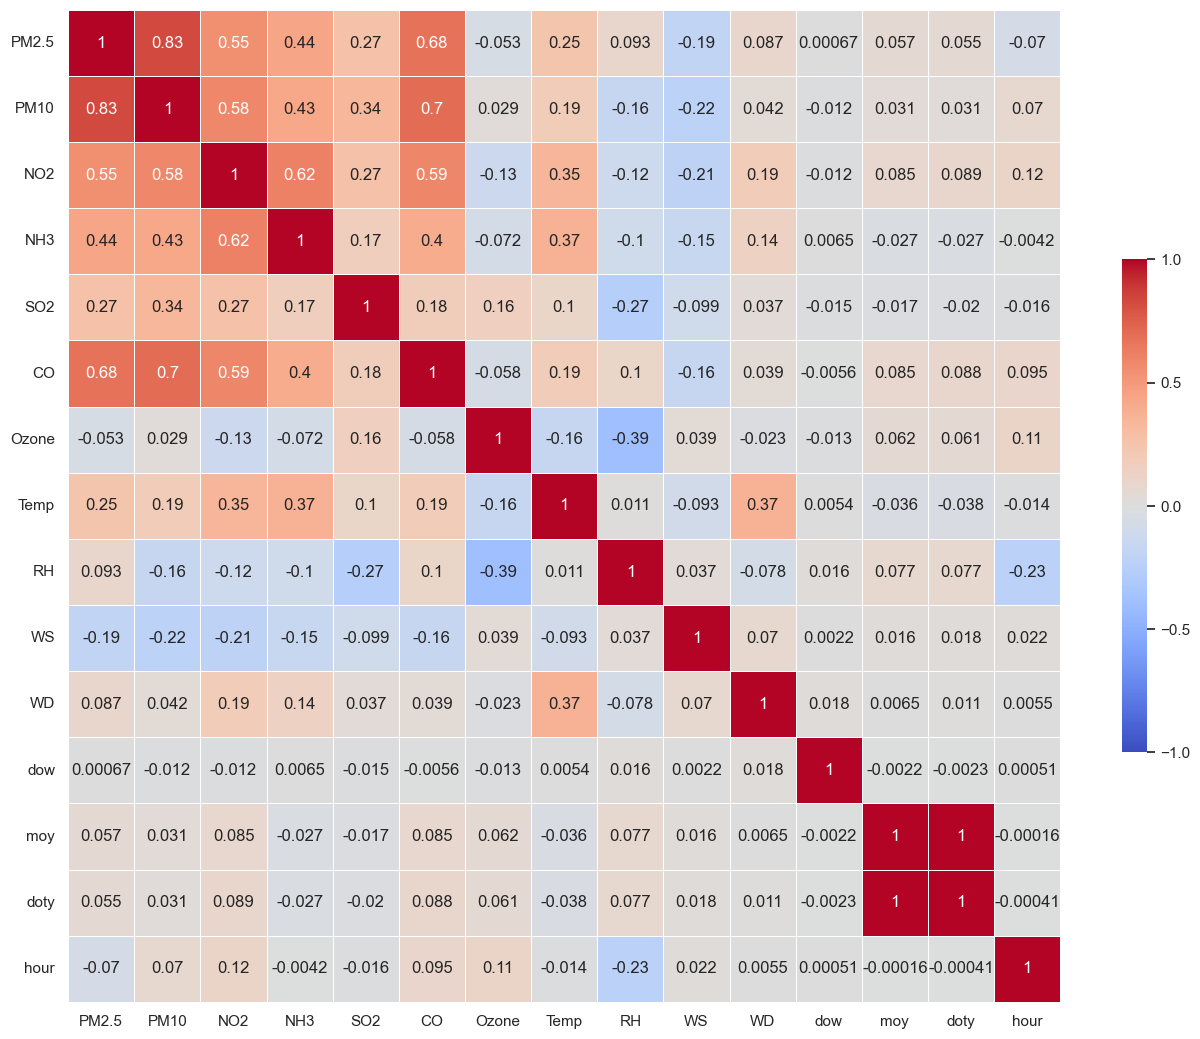

In [126]:
correlation(df)

In [127]:
df['Wind']=df['WD']/df['WS']
df['Dew']=df['Temp']-((100-df['RH'])/5)

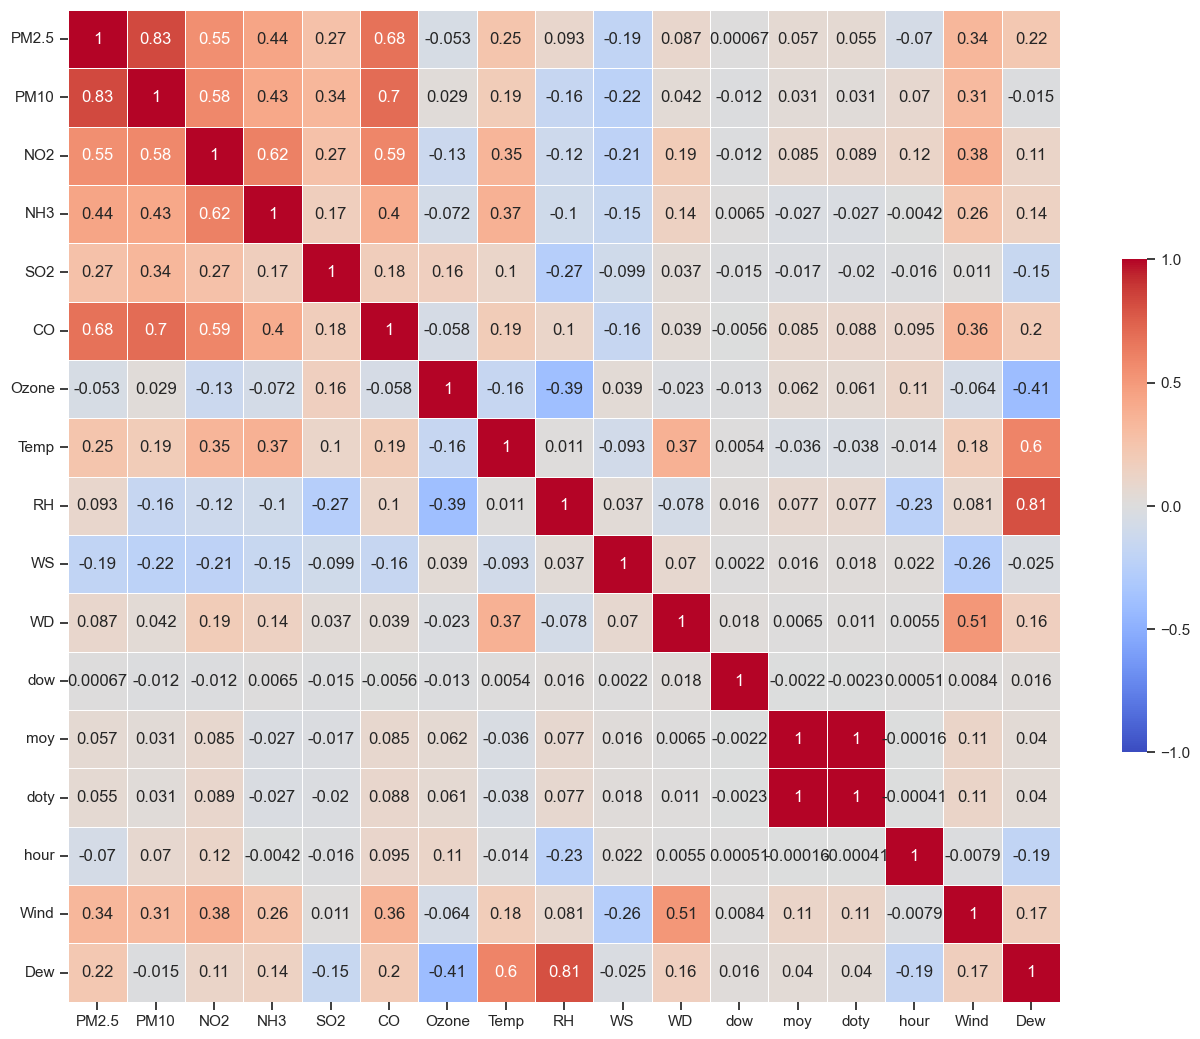

In [128]:
correlation(df)

In [129]:
df.drop(columns=['WS','WD'],inplace=True)

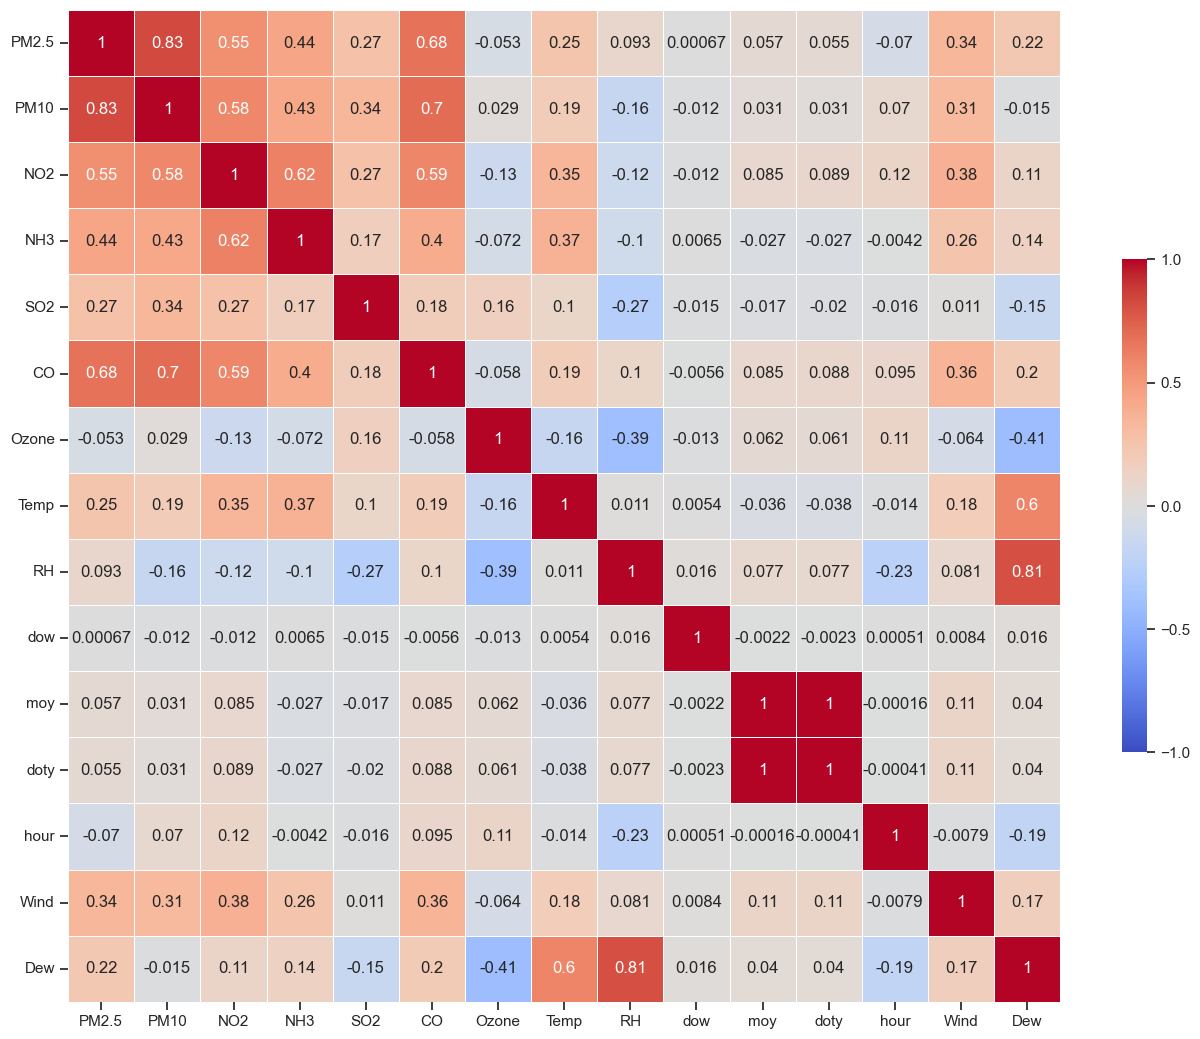

In [130]:
correlation(df)